In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys
import os

# 1/ Plot / visualize the 'original' dataset

In [2]:
df = pd.read_csv(r'C:\Users\dimit\OneDrive\Bureau\Pace classes\CS 677 - Machine Learning\Project 2\temperature_device_failure.csv')
# for file in os.listdir(r'C:\Users\dimit\OneDrive\Bureau\Pace classes\CS 677 - Machine Learning\Project 2'):
#                        print(file)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7267 non-null   object 
 1   value      7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB


timestamp column isnt a datetime object column. Will start by transforming it as such

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors = 'coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 113.7 KB


In [6]:
df.set_index('timestamp', inplace=True)

<AxesSubplot:xlabel='timestamp'>

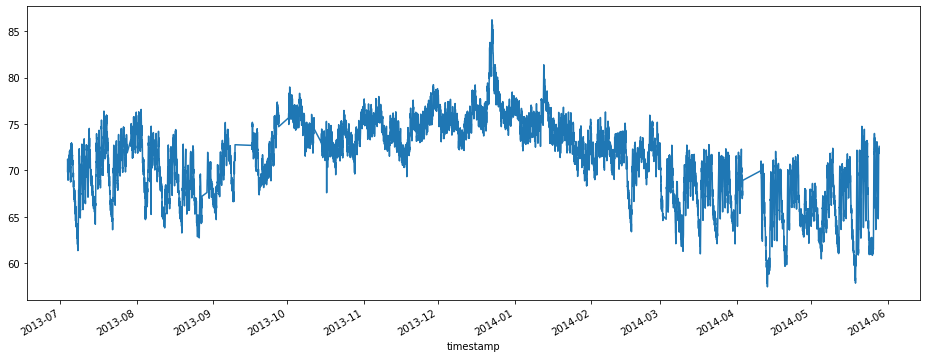

In [7]:
df['value'].plot(figsize = (16,6))

<AxesSubplot:xlabel='timestamp', ylabel='value'>

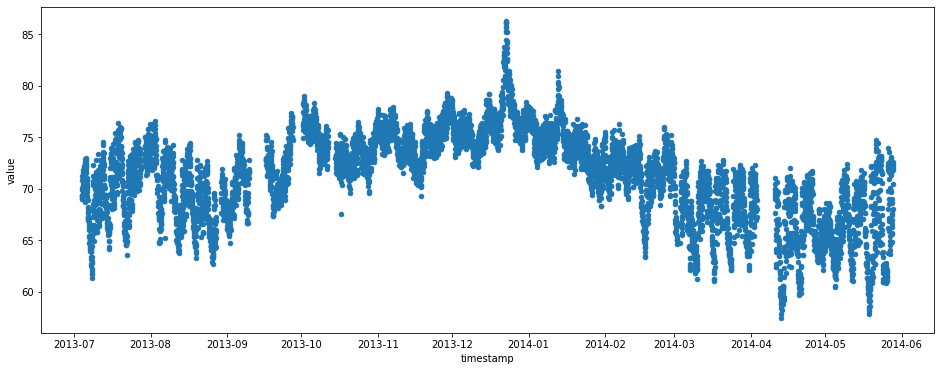

In [8]:
df.reset_index().plot(kind='scatter', x = 'timestamp', y = 'value', figsize = (16,6))

#  2/ Perform Feature Engineering on the dataset such that new features to be added

In [9]:
from datetime import datetime

In [10]:
df['dcat'] = pd.to_datetime(df.index)
df['year'] = pd.to_datetime(df.index)
df['month'] = pd.to_datetime(df.index)
df['day'] = pd.to_datetime(df.index)
df['dayOfWeek'] = pd.to_datetime(df.index)
df['dayOfMonth'] = pd.to_datetime(df.index)
df['hour'] = pd.to_datetime(df.index)

def dcat_column_builder(x):
    if datetime.strftime(x, '%A') not in ['Saturday','Sunday']:
        if int(datetime.strftime(x, '%H')) >= 7 and int(datetime.strftime(x, '%H')) <=19:
            return 'Weekday Day'
        else:
            return 'Weekday Night'
    else:
        if int(datetime.strftime(x, '%H')) >= 7 and int(datetime.strftime(x, '%H')) <=19:
            return 'Weekend Day'
        else:
            return 'Weekend Night'
def year(x):
    return int(datetime.strftime(x, '%Y'))
def month(x):
    return int(datetime.strftime(x, '%m'))
def day(x):
    return int(datetime.strftime(x, '%j'))
def dayOfWeek(x):
    return int(datetime.strftime(x, '%w'))
def dayOfMonth(x):
    return int(datetime.strftime(x, '%d'))
def hour(x):
    return int(datetime.strftime(x, '%H'))

df['dcat'] = df['dcat'].apply(lambda x:dcat_column_builder(x))
df['year'] = df['year'].apply(lambda x:year(x))
df['month'] = df['month'].apply(lambda x:month(x))
df['day'] = df['day'].apply(lambda x:day(x))
df['dayOfWeek'] = df['dayOfWeek'].apply(lambda x:dayOfWeek(x))
df['dayOfMonth'] = df['dayOfMonth'].apply(lambda x:dayOfMonth(x))
df['hour'] = df['hour'].apply(lambda x:hour(x))

# df['dcat'] = df['dcat'].apply(lambda x:dcat_column_builder(x))
df

,value,dcat,year,month,day,dayOfWeek,dayOfMonth,hour
timestamp,,,,,,,,
2013-07-04 00:00:00,69.880835,Weekday Night,2013,7,185,4,4,0
2013-07-04 01:00:00,71.220227,Weekday Night,2013,7,185,4,4,1
2013-07-04 02:00:00,70.877805,Weekday Night,2013,7,185,4,4,2
2013-07-04 03:00:00,68.959400,Weekday Night,2013,7,185,4,4,3
2013-07-04 04:00:00,69.283551,Weekday Night,2013,7,185,4,4,4
...,...,...,...,...,...,...,...,...
2014-05-28 11:00:00,72.370206,Weekday Day,2014,5,148,3,28,11
2014-05-28 12:00:00,72.172956,Weekday Day,2014,5,148,3,28,12
2014-05-28 13:00:00,72.046565,Weekday Day,2014,5,148,3,28,13


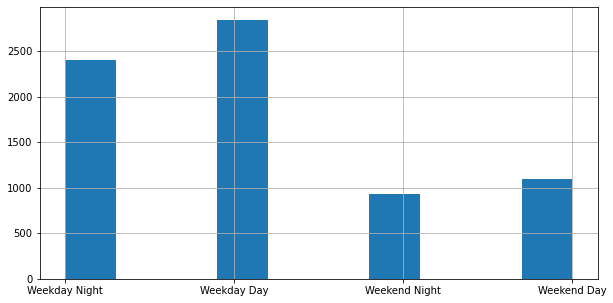

In [11]:
df['dcat'].hist(figsize = (10, 5))
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['dcat'] = le.fit_transform(df['dcat'])
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'Weekday Day': 0, 'Weekday Night': 1, 'Weekend Day': 2, 'Weekend Night': 3}


In [13]:
reverse_dictionnary = { 0:'Weekday Day',  1 :'Weekday Night',  2:'Weekend Day', 3:'Weekend Night'}

In [14]:
df

,value,dcat,year,month,day,dayOfWeek,dayOfMonth,hour
timestamp,,,,,,,,
2013-07-04 00:00:00,69.880835,1,2013,7,185,4,4,0
2013-07-04 01:00:00,71.220227,1,2013,7,185,4,4,1
2013-07-04 02:00:00,70.877805,1,2013,7,185,4,4,2
2013-07-04 03:00:00,68.959400,1,2013,7,185,4,4,3
2013-07-04 04:00:00,69.283551,1,2013,7,185,4,4,4
...,...,...,...,...,...,...,...,...
2014-05-28 11:00:00,72.370206,0,2014,5,148,3,28,11
2014-05-28 12:00:00,72.172956,0,2014,5,148,3,28,12
2014-05-28 13:00:00,72.046565,0,2014,5,148,3,28,13


In [15]:
y = df['value']
X = df.drop(columns='value')
# sys.exit('abc')
X

,dcat,year,month,day,dayOfWeek,dayOfMonth,hour
timestamp,,,,,,,
2013-07-04 00:00:00,1,2013,7,185,4,4,0
2013-07-04 01:00:00,1,2013,7,185,4,4,1
2013-07-04 02:00:00,1,2013,7,185,4,4,2
2013-07-04 03:00:00,1,2013,7,185,4,4,3
2013-07-04 04:00:00,1,2013,7,185,4,4,4
...,...,...,...,...,...,...,...
2014-05-28 11:00:00,0,2014,5,148,3,28,11
2014-05-28 12:00:00,0,2014,5,148,3,28,12
2014-05-28 13:00:00,0,2014,5,148,3,28,13


#  Apply the K-Means algorithm to the revised dataset and determine the best value for K. I would suggest to test K in the range of [1, 20]. Plot a graph showing the number of clusters (K) in relation to score of each K-Means model.

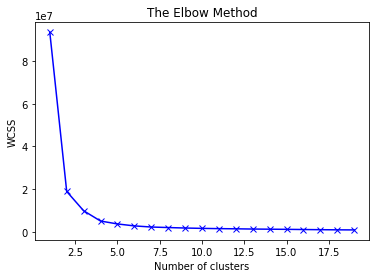

In [16]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


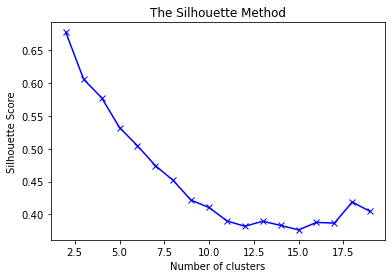

In [17]:
from sklearn.metrics import silhouette_score
silhouettes_list= []
for i in range(2,20):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    silhouettes_list.append(silhouette_score(X,cluster_labels))

plt.plot(range(2, 20), silhouettes_list, 'bx-')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# After determining the best value of K, plot (scatter plot) all these K clusters by choosing 2 features from the dataset. Should the dataset has more than 2 features (which most likely will be the case), apply PCA to derive those 2 features (2 Principal Components)

In [18]:
# from sklearn.preprocessing import RobustScaler
# rc = RobustScaler()
# df = rc.fit_transform(df)
# df = pd.DataFrame(df, columns =['value', 'dcat', 'year', 'month', 'day', 'dayOfWeek', 'dayOfMonth','hour'])
df1 = df.copy()
X

,dcat,year,month,day,dayOfWeek,dayOfMonth,hour
timestamp,,,,,,,
2013-07-04 00:00:00,1,2013,7,185,4,4,0
2013-07-04 01:00:00,1,2013,7,185,4,4,1
2013-07-04 02:00:00,1,2013,7,185,4,4,2
2013-07-04 03:00:00,1,2013,7,185,4,4,3
2013-07-04 04:00:00,1,2013,7,185,4,4,4
...,...,...,...,...,...,...,...
2014-05-28 11:00:00,0,2014,5,148,3,28,11
2014-05-28 12:00:00,0,2014,5,148,3,28,12
2014-05-28 13:00:00,0,2014,5,148,3,28,13


(array([  55.,  244.,  705., 1070., 1549., 2019., 1380.,  198.,   32.,
          15.]),
 array([57.45840559, 60.33488629, 63.21136699, 66.0878477 , 68.9643284 ,
        71.8408091 , 74.7172898 , 77.5937705 , 80.47025121, 83.34673191,
        86.22321261]),
 <BarContainer object of 10 artists>)

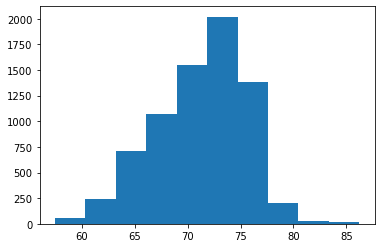

In [19]:
plt.hist(y)

In [20]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(pca.feature_names_in_)
# X = pca.inverse_transform(X)
# sys.exit('abc')

[0.99012192 0.00575917]
['dcat' 'year' 'month' 'day' 'dayOfWeek' 'dayOfMonth' 'hour']


In [21]:
# print(X)

In [22]:
X = pd.DataFrame(X, columns = ['feature 1','feature 2'])
# X = pd.DataFrame(X, columns = ['feature 1'])

In [23]:
X.shape

(7267, 2)

In [24]:
X

,feature 1,feature 2
0,-1.413026,-11.737843
1,-1.413074,-11.745776
2,-1.413121,-11.753708
3,-1.413169,-11.761641
4,-1.413216,-11.769574
...,...,...
7262,35.501867,12.397125
7263,35.501820,12.389192
7264,35.501772,12.381259
7265,35.501725,12.373326


1    3326
2    2126
0    1815
dtype: int64


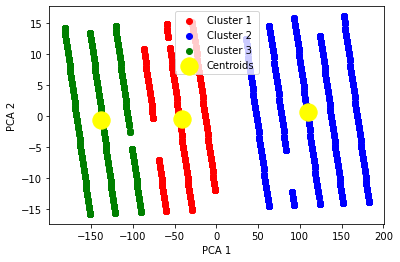

{'Weekday Day': 0, 'Weekday Night': 1, 'Weekend Day': 2, 'Weekend Night': 3}


In [25]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 42)
# kmeans.fit_transform(df)

# print(kmeans)
kmeansx = kmeans.fit_predict(X)
print(pd.DataFrame(kmeansx).value_counts())

# Visualising the clusters
plt.scatter(X[kmeansx  == 0]['feature 1'], X[kmeansx  == 0]['feature 2'], c = 'red', label = 'Cluster 1')
plt.scatter(X[kmeansx  == 1]['feature 1'], X[kmeansx  == 1]['feature 2'], c = 'blue', label = 'Cluster 2')
plt.scatter(X[kmeansx  == 2]['feature 1'], X[kmeansx  == 2]['feature 2'], c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()
print(dictionary)

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


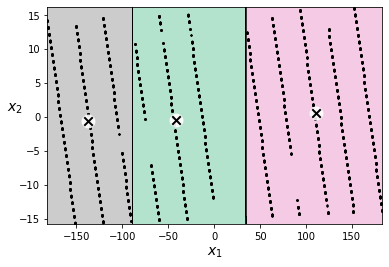

In [26]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
plot_decision_boundaries(kmeans, X.to_numpy())
plt.show()

# All following steps should be executed twice:

## 5/ Apply the Gaussian distribution (EllipticEnvelope) algorithm, as defined at step 2. List anomalies (if any) in each category and show them graphically

### - for outliers_fraction = 0.01 (1%), assume that someone gave us this figure

In [27]:
from sklearn.covariance import EllipticEnvelope
elpenv = EllipticEnvelope(contamination=0.01)
pred = elpenv.fit_predict(df[['value']])#X
pred

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
pred.shape

(7267,)

In [29]:
pd.DataFrame(pred).value_counts()

 1    7194
-1      73
dtype: int64

In [30]:
print('the list of outlier values detected by EllipticEnvelope are:')
for index_num in np.where(pred==-1):
    list_of_indexes = index_num.tolist()
    break
print(df.iloc[list_of_indexes,0])

the list of outlier values detected by EllipticEnvelope are:
timestamp
2013-12-21 22:00:00    83.247886
2013-12-22 01:00:00    83.780995
2013-12-22 16:00:00    83.511630
2013-12-22 17:00:00    84.390932
2013-12-22 18:00:00    85.227685
                         ...    
2014-05-19 03:00:00    59.074691
2014-05-19 05:00:00    59.711858
2014-05-19 06:00:00    60.375894
2014-05-19 07:00:00    60.171092
2014-05-19 08:00:00    60.296682
Name: value, Length: 73, dtype: float64


Plot for Weekday Day outliers


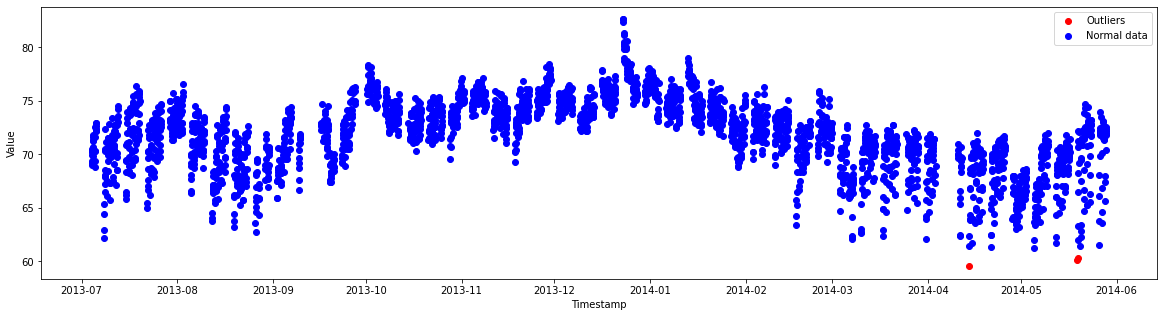

Plot for Weekday Night outliers


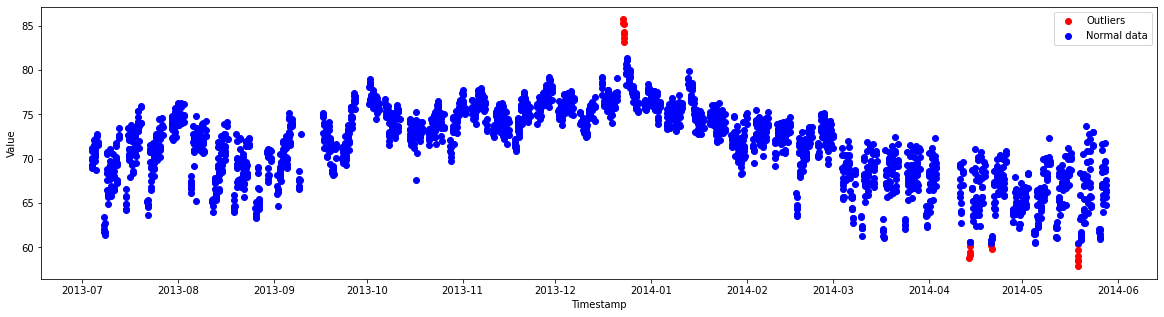

Plot for Weekend Day outliers


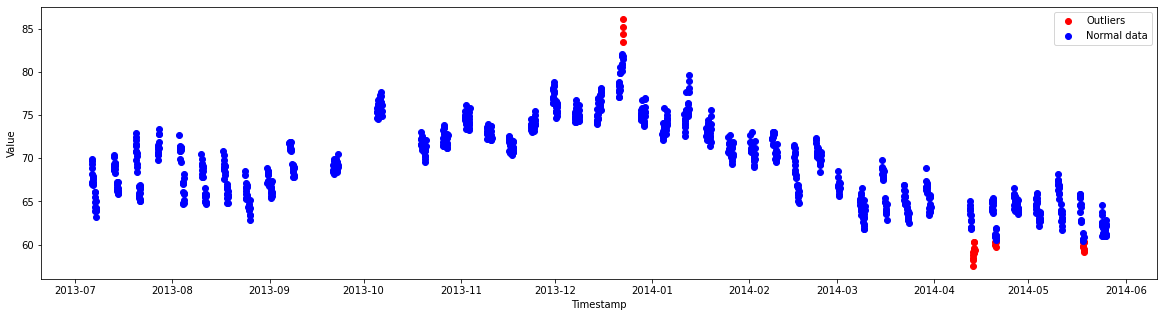

Plot for Weekend Night outliers


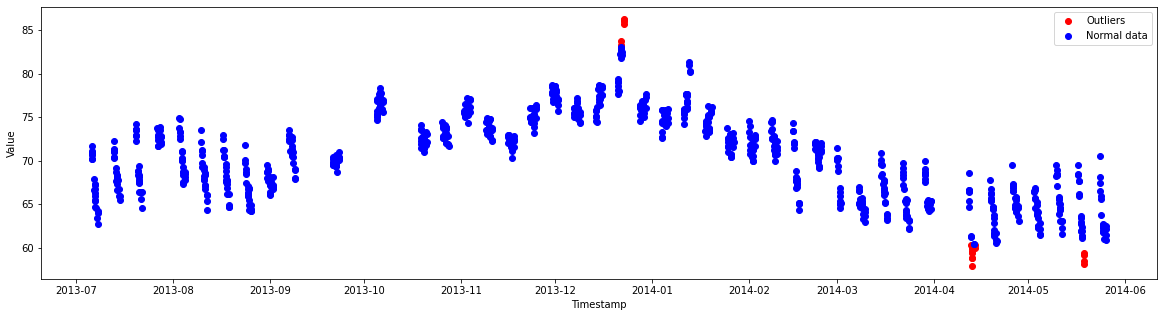

In [31]:
for i in range(0,4):
    print('Plot for {outlier} outliers'.format(outlier = reverse_dictionnary[i]))
    plt.figure(figsize=(20, 5))
    plt.scatter(df[(df['dcat'] == i) & (pred  == -1)].index, df[(df['dcat'] == i) & (pred  == -1)]['value'], c = 'red', label = 'Outliers')
    plt.scatter(df[(df['dcat'] == i) & (pred  == 1)].index, df[(df['dcat'] == i) & (pred  == 1)]['value'], c = 'blue', label = 'Normal data')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('')
    plt.legend()
    plt.show()

### - calculate outliers_fraction by finding the total number of outliers utilizing the IQR Method; specifically use the 1.5xIQR rule.

In [32]:
q1, q3= np.percentile(df['value'],[25,75])
print(q1,q3)

68.36941051 74.43095786


In [33]:
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
upper_outliers = df[df['value']>upper_bound]
lower_outliers = df[df['value']<lower_bound]
print(lower_bound,upper_bound,iqr)
outliers_percentage = (len(upper_outliers)+len(lower_outliers))/len(df)

59.277089484999976 83.52327888500002 6.061547350000012


In [34]:
print(len(upper_outliers)+len(lower_outliers),len(df))

35 7267


In [35]:
print(f'Using IQR method, {round(outliers_percentage*100,2)} % of values are outliers in the dataset, therefore we must use the value {round(outliers_percentage,4)}')

Using IQR method, 0.48 % of values are outliers in the dataset, therefore we must use the value 0.0048


In [36]:
from sklearn.covariance import EllipticEnvelope
elpenv = EllipticEnvelope(contamination=0.0048)
pred2 = elpenv.fit_predict(df[['value']])#X
pred2

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
pred2.shape

(7267,)

In [38]:
pd.DataFrame(pred2).value_counts()

 1    7232
-1      35
dtype: int64

In [39]:
print('the list of outlier values detected by EllipticEnvelope are:')
for index_num in np.where(pred2==-1):
    list_of_indexes2 = index_num.tolist()
    break
print(df.iloc[list_of_indexes,0])

the list of outlier values detected by EllipticEnvelope are:
timestamp
2013-12-21 22:00:00    83.247886
2013-12-22 01:00:00    83.780995
2013-12-22 16:00:00    83.511630
2013-12-22 17:00:00    84.390932
2013-12-22 18:00:00    85.227685
                         ...    
2014-05-19 03:00:00    59.074691
2014-05-19 05:00:00    59.711858
2014-05-19 06:00:00    60.375894
2014-05-19 07:00:00    60.171092
2014-05-19 08:00:00    60.296682
Name: value, Length: 73, dtype: float64


Plot for Weekday Day outliers


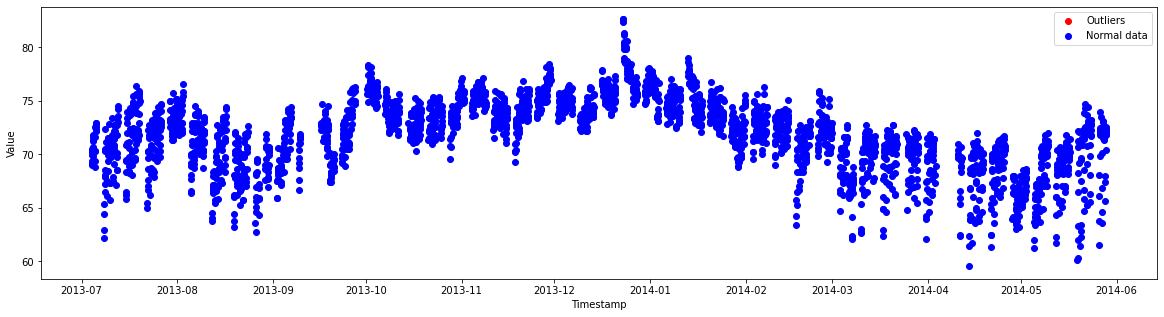

Plot for Weekday Night outliers


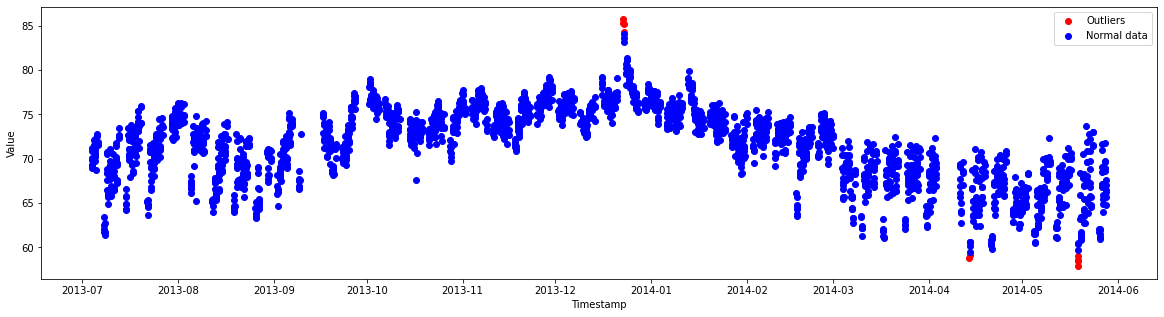

Plot for Weekend Day outliers


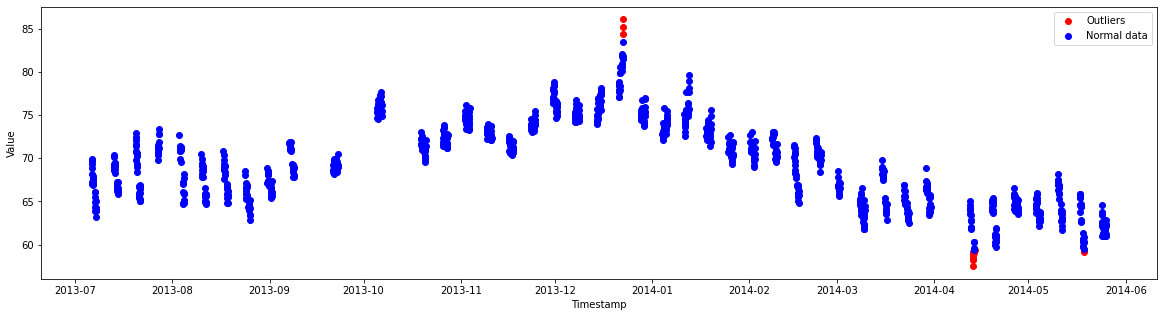

Plot for Weekend Night outliers


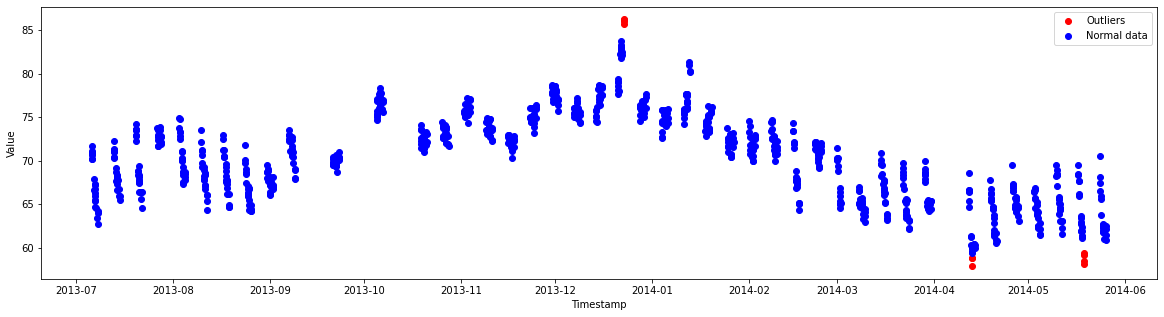

In [40]:
for i in range(0,4):
    print('Plot for {outlier} outliers'.format(outlier = reverse_dictionnary[i]))
    plt.figure(figsize=(20, 5))
    plt.scatter(df[(df['dcat'] == i) & (pred2  == -1)].index, df[(df['dcat'] == i) & (pred2  == -1)]['value'], c = 'red', label = 'Outliers')
    plt.scatter(df[(df['dcat'] == i) & (pred2  == 1)].index, df[(df['dcat'] == i) & (pred2  == 1)]['value'], c = 'blue', label = 'Normal data')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('')
    plt.legend()
    plt.show()

## 6/ Apply the Isolation Forest algorithm at each category, as defined step 2. List anomalies (if any) in each category and show them graphically

### - for outliers_fraction = 0.01 (1%), assume that someone gave us this figure

In [41]:
from sklearn.ensemble import IsolationForest
isofor = IsolationForest(contamination=0.01)
pred_iso = isofor.fit_predict(df[['value']])#X
pred_iso

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [42]:
pred_iso.shape

(7267,)

In [43]:
pd.DataFrame(pred_iso).value_counts()

 1    7194
-1      73
dtype: int64

In [44]:
print('the list of outlier values detected by IsolationForest are:')
for index_num in np.where(pred==-1):
    list_of_indexes3 = index_num.tolist()
    break
print(df.iloc[list_of_indexes,0])

the list of outlier values detected by IsolationForest are:
timestamp
2013-12-21 22:00:00    83.247886
2013-12-22 01:00:00    83.780995
2013-12-22 16:00:00    83.511630
2013-12-22 17:00:00    84.390932
2013-12-22 18:00:00    85.227685
                         ...    
2014-05-19 03:00:00    59.074691
2014-05-19 05:00:00    59.711858
2014-05-19 06:00:00    60.375894
2014-05-19 07:00:00    60.171092
2014-05-19 08:00:00    60.296682
Name: value, Length: 73, dtype: float64


Plot for Weekday Day outliers


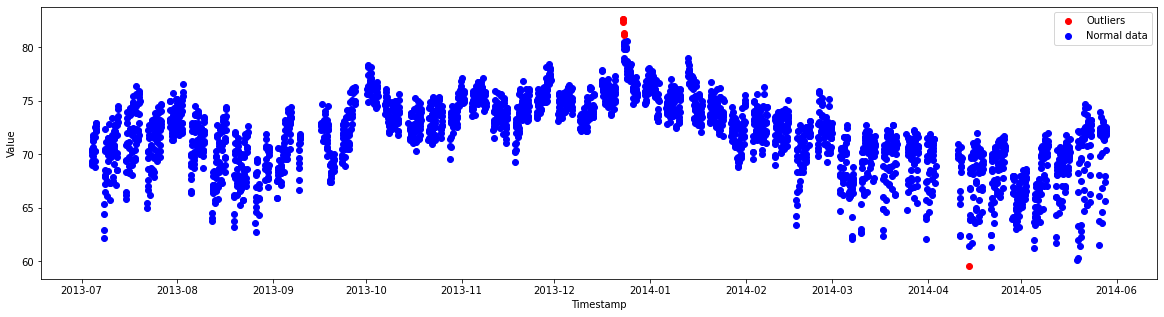

Plot for Weekday Night outliers


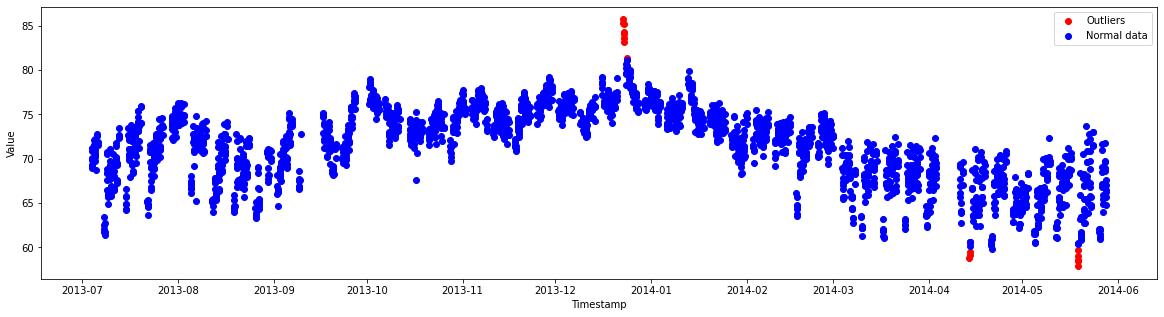

Plot for Weekend Day outliers


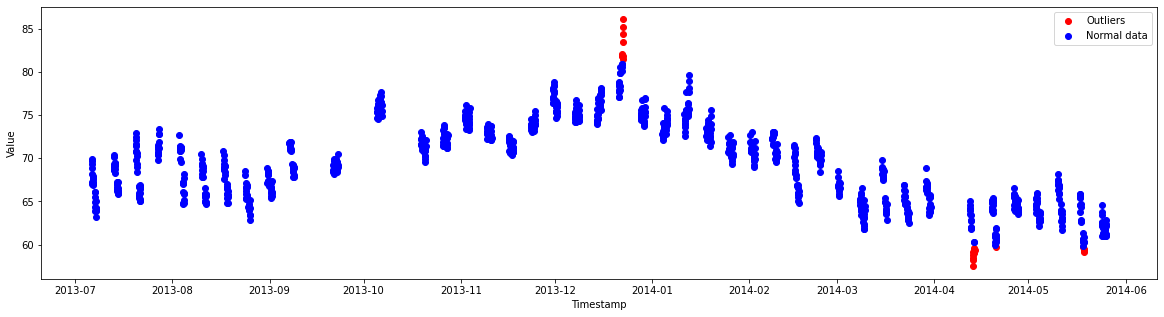

Plot for Weekend Night outliers


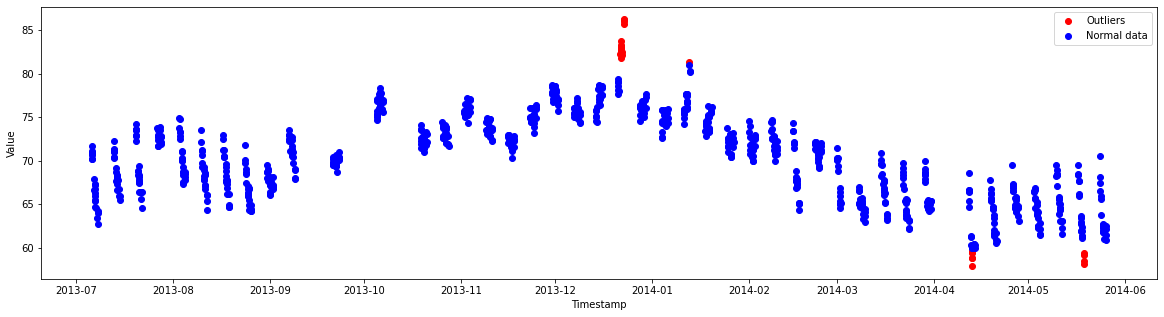

In [45]:
# Visualising the clusters
for i in range(0,4):
    print('Plot for {outlier} outliers'.format(outlier = reverse_dictionnary[i]))
    plt.figure(figsize=(20, 5))
    plt.scatter(df[(df['dcat'] == i) & (pred_iso  == -1)].index, df[(df['dcat'] == i) & (pred_iso  == -1)]['value'], c = 'red', label = 'Outliers')
    plt.scatter(df[(df['dcat'] == i) & (pred_iso  == 1)].index, df[(df['dcat'] == i) & (pred_iso  == 1)]['value'], c = 'blue', label = 'Normal data')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

### - calculate outliers_fraction by finding the total number of outliers utilizing the IQR Method; specifically use the 1.5xIQR rule.

In [46]:
from sklearn.ensemble import IsolationForest
isofor = IsolationForest(contamination=0.0048)
pred_iso2 = isofor.fit_predict(df[['value']])#X
pred_iso2

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [47]:
pred_iso2.shape

(7267,)

In [48]:
pd.DataFrame(pred_iso2).value_counts()

 1    7234
-1      33
dtype: int64

In [49]:
print('the list of outlier values detected by IsolationForest are:')
for index_num in np.where(pred==-1):
    list_of_indexes4 = index_num.tolist()
    break
print(df.iloc[list_of_indexes,0])

the list of outlier values detected by IsolationForest are:
timestamp
2013-12-21 22:00:00    83.247886
2013-12-22 01:00:00    83.780995
2013-12-22 16:00:00    83.511630
2013-12-22 17:00:00    84.390932
2013-12-22 18:00:00    85.227685
                         ...    
2014-05-19 03:00:00    59.074691
2014-05-19 05:00:00    59.711858
2014-05-19 06:00:00    60.375894
2014-05-19 07:00:00    60.171092
2014-05-19 08:00:00    60.296682
Name: value, Length: 73, dtype: float64


Plot for Weekday Day outliers


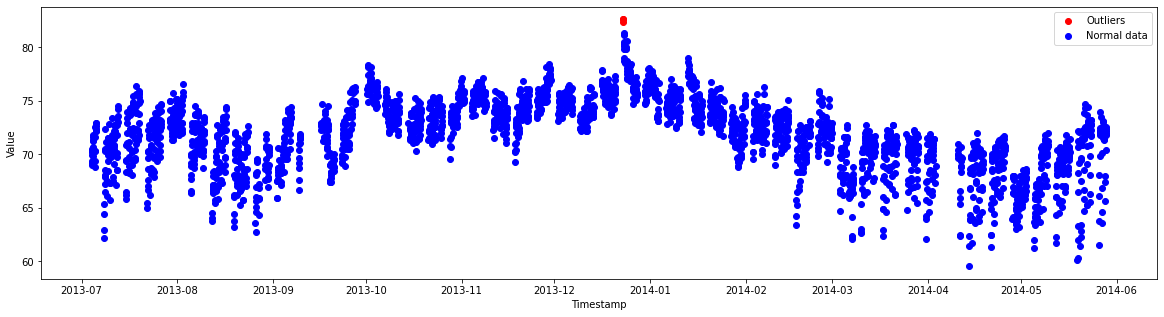

Plot for Weekday Night outliers


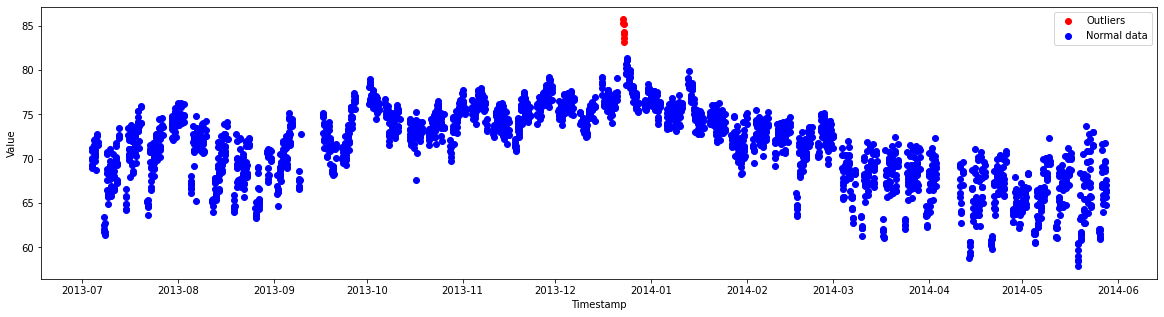

Plot for Weekend Day outliers


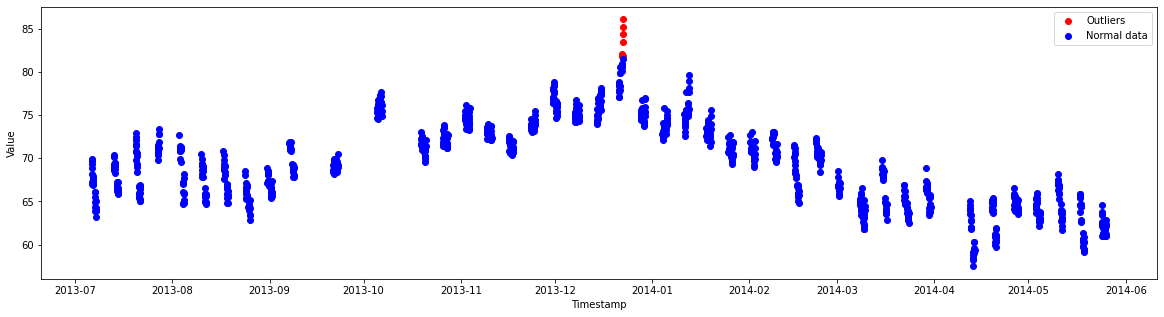

Plot for Weekend Night outliers


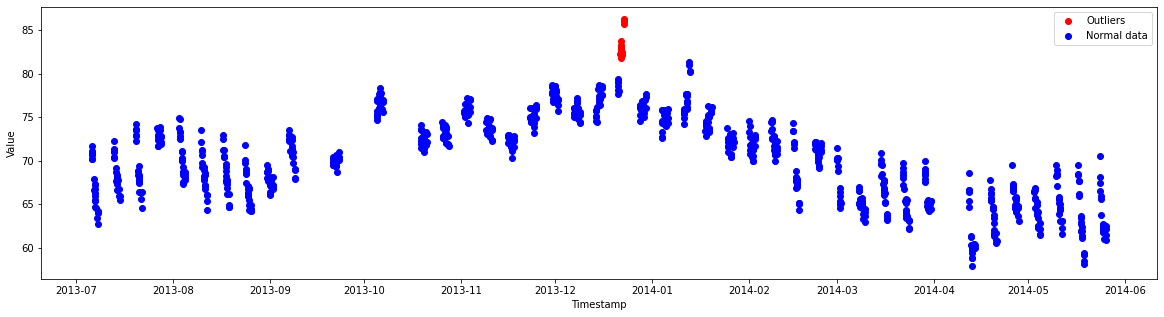

In [50]:
# Visualising the clusters
for i in range(0,4):
    print('Plot for {outlier} outliers'.format(outlier = reverse_dictionnary[i]))
    plt.figure(figsize=(20, 5))
    plt.scatter(df[(df['dcat'] == i) & (pred_iso2  == -1)].index, df[(df['dcat'] == i) & (pred_iso2  == -1)]['value'], c = 'red', label = 'Outliers')
    plt.scatter(df[(df['dcat'] == i) & (pred_iso2  == 1)].index, df[(df['dcat'] == i) & (pred_iso2  == 1)]['value'], c = 'blue', label = 'Normal data')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

## 7) Which of the two (2) models performs better on detecting anomalies?

### - for outliers_fraction = 0.01 (1%), assume that someone gave us this figure

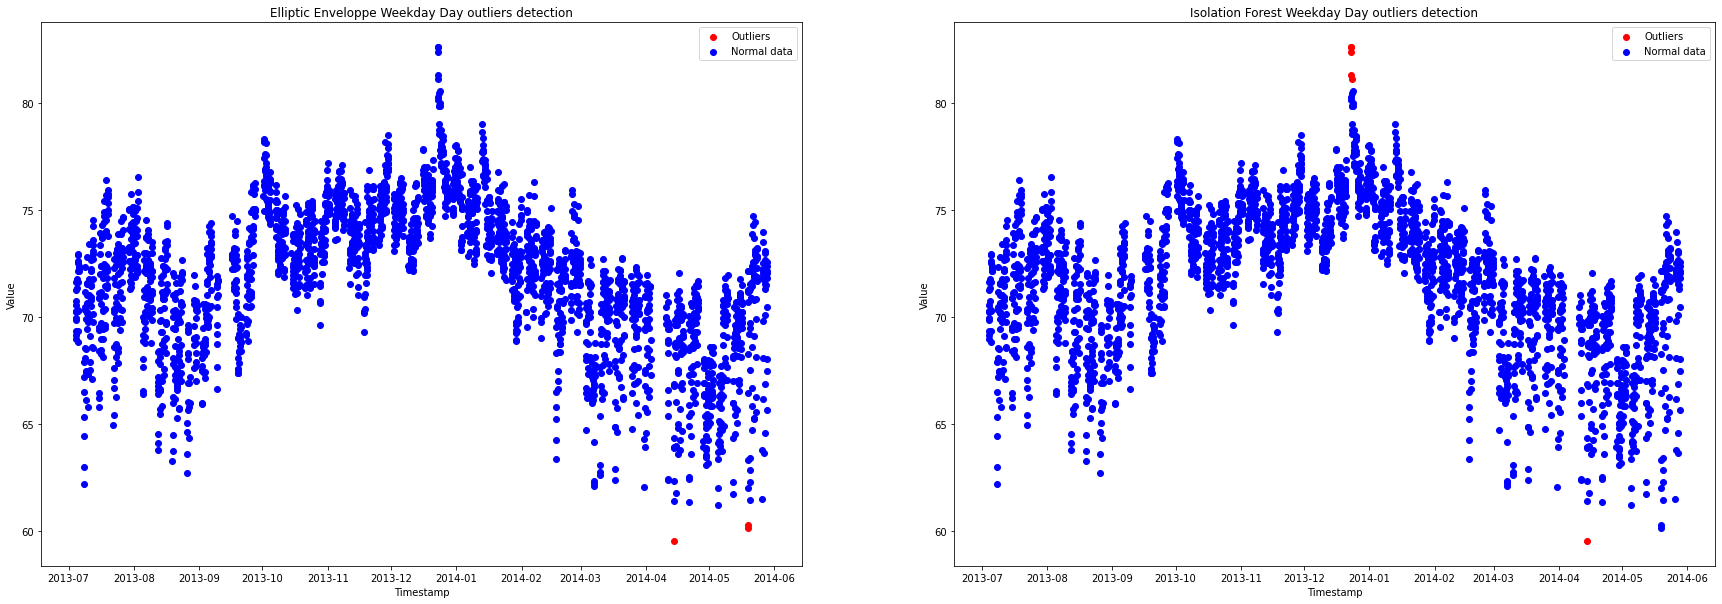

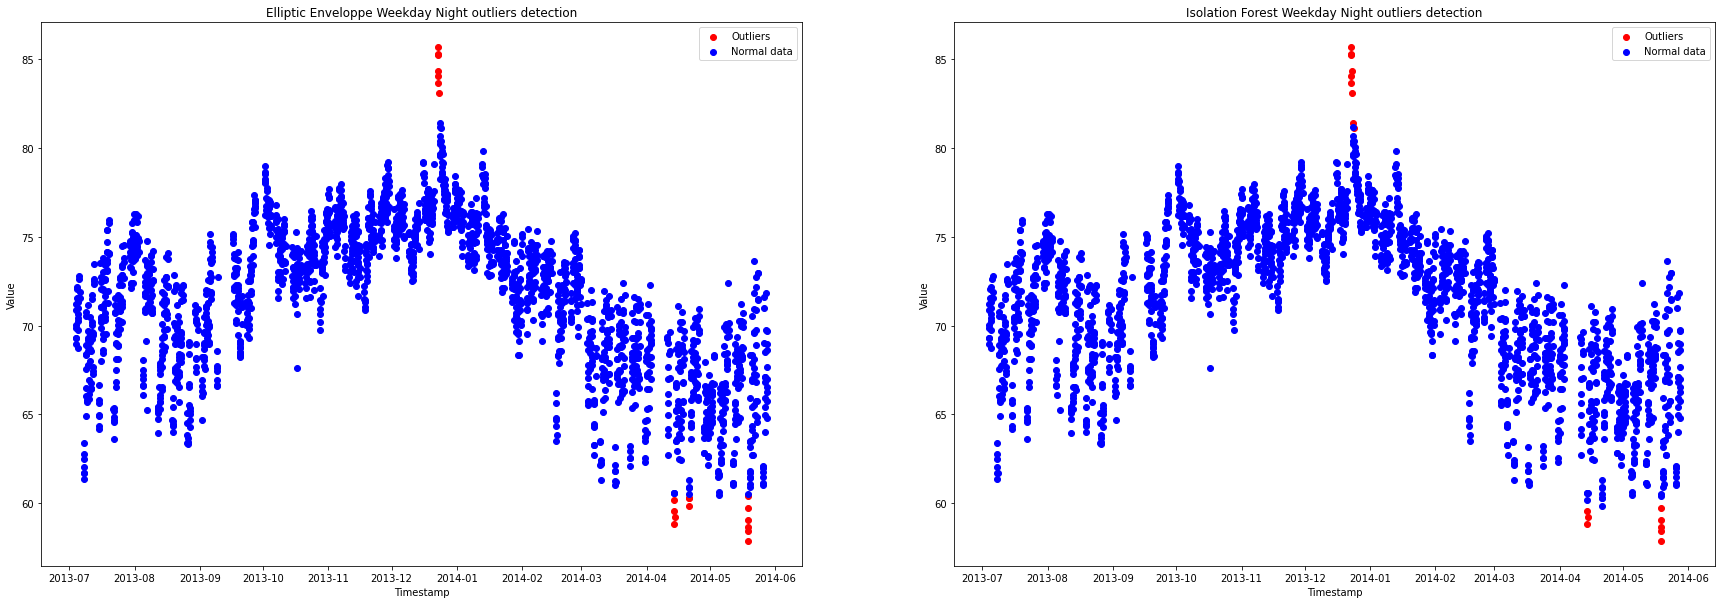

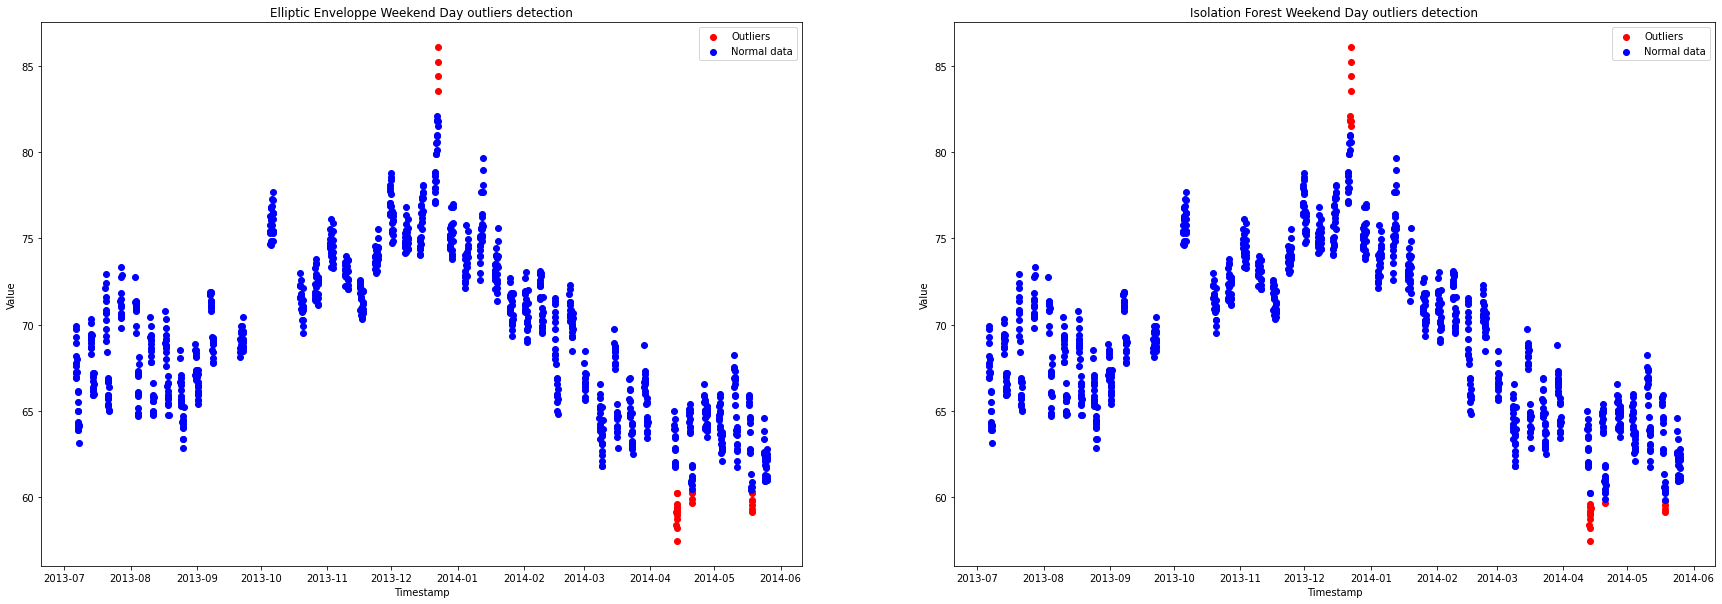

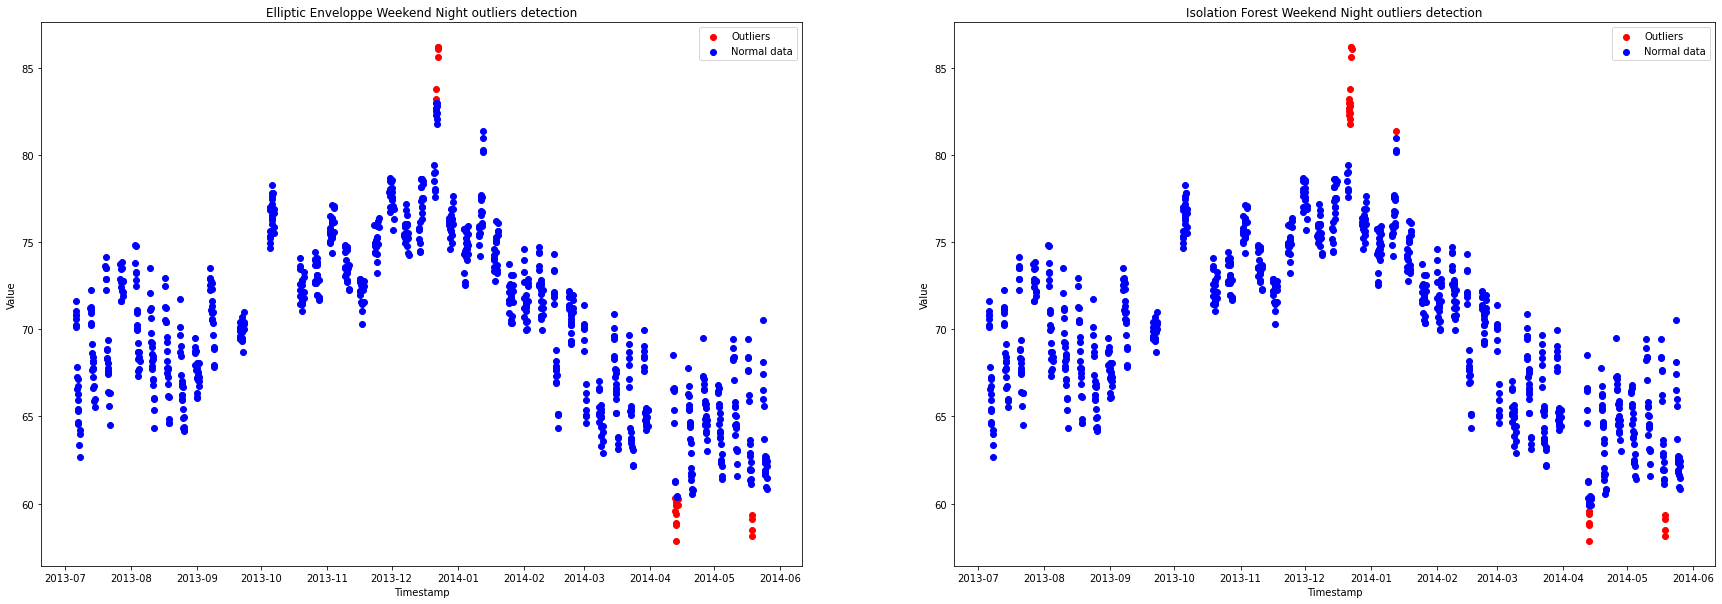

In [51]:
for i in range(0,4):
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.scatter(df[(df['dcat'] == i) & (pred  == -1)].index, df[(df['dcat'] == i) & (pred  == -1)]['value'], c = 'red', label = 'Outliers')
    ax.scatter(df[(df['dcat'] == i) & (pred  == 1)].index, df[(df['dcat'] == i) & (pred  == 1)]['value'], c = 'blue', label = 'Normal data')
    ax2.scatter(df[(df['dcat'] == i) & (pred_iso  == -1)].index, df[(df['dcat'] == i) & (pred_iso  == -1)]['value'], c = 'red', label = 'Outliers')
    ax2.scatter(df[(df['dcat'] == i) & (pred_iso  == 1)].index, df[(df['dcat'] == i) & (pred_iso  == 1)]['value'], c = 'blue', label = 'Normal data')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Value')
    ax2.set_xlabel('Timestamp')
    ax2.set_ylabel('Value')
    ax.set_title(f'Elliptic Enveloppe {reverse_dictionnary[i]} outliers detection')
    ax2.set_title(f'Isolation Forest {reverse_dictionnary[i]} outliers detection')
    ax.legend()
    ax2.legend()

### - calculate outliers_fraction by finding the total number of outliers utilizing the IQR Method; specifically use the 1.5xIQR rule.

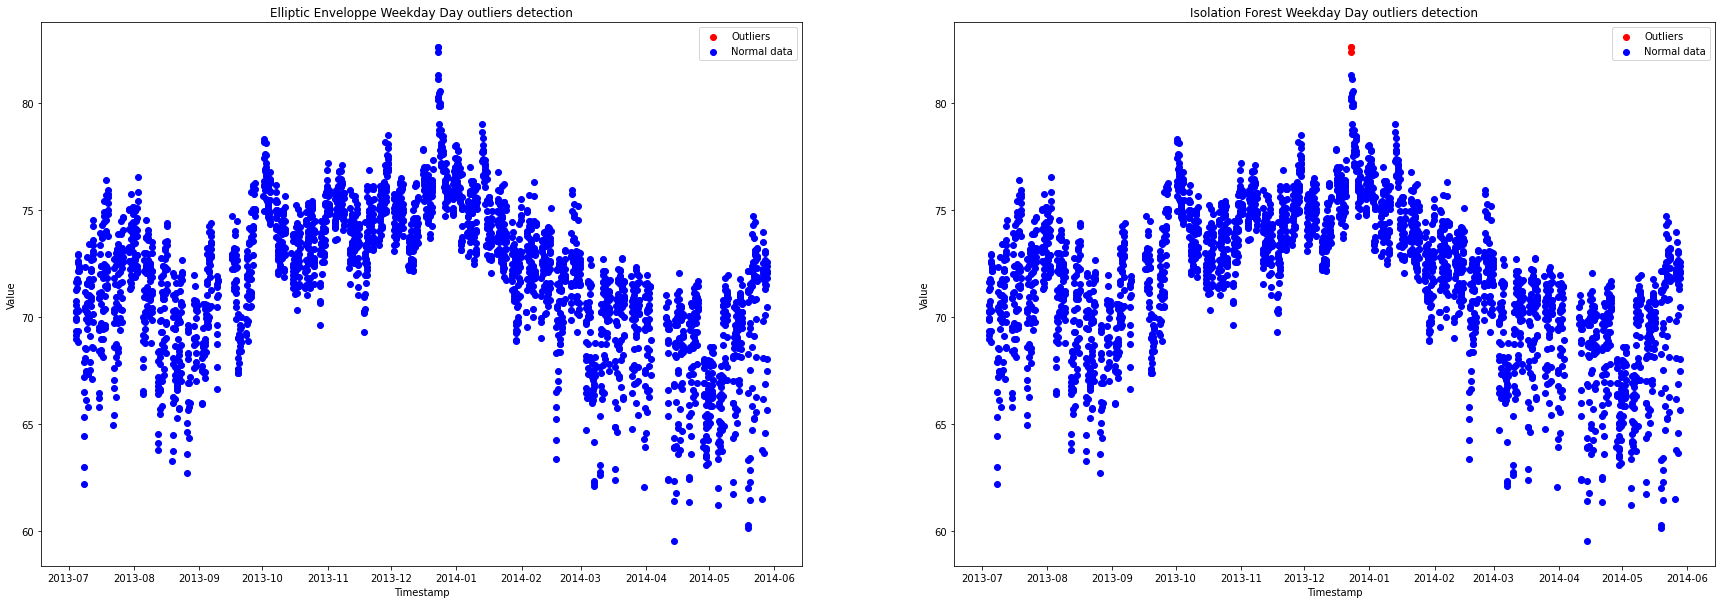

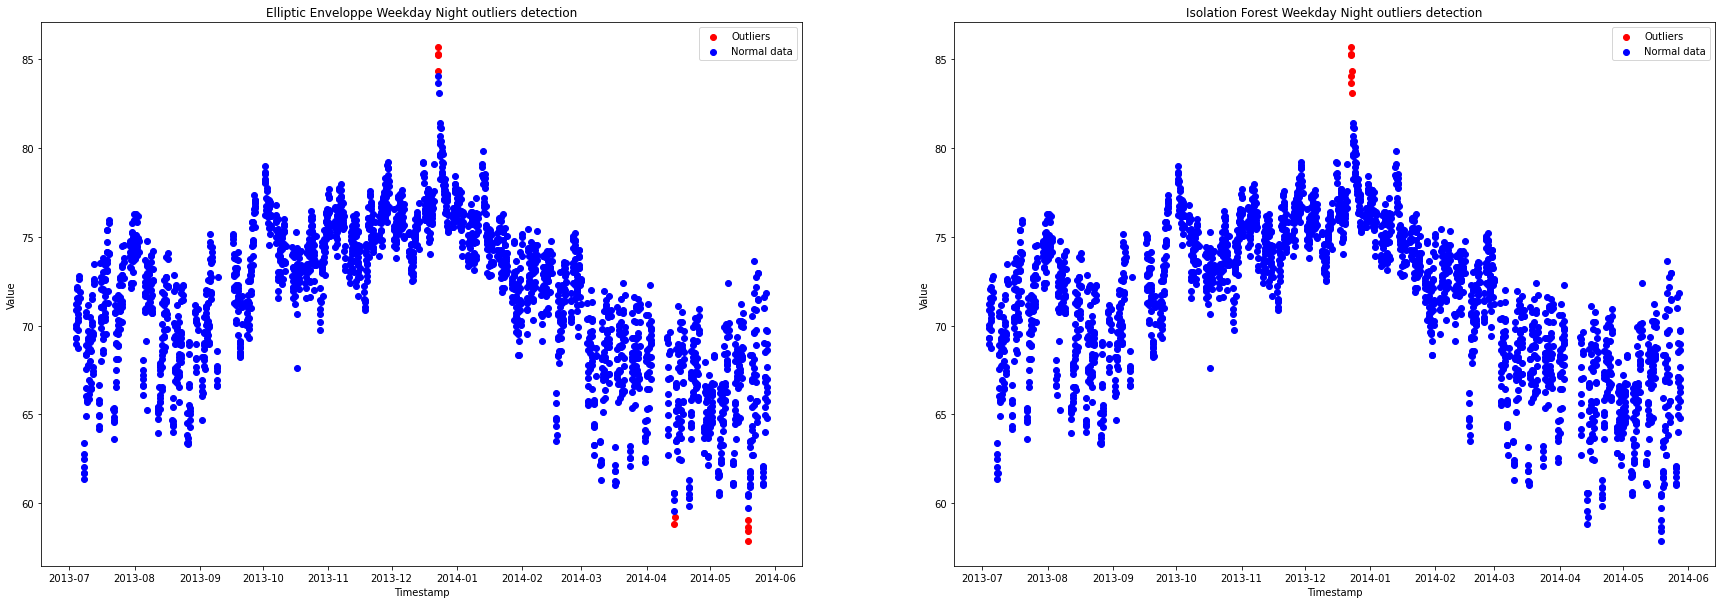

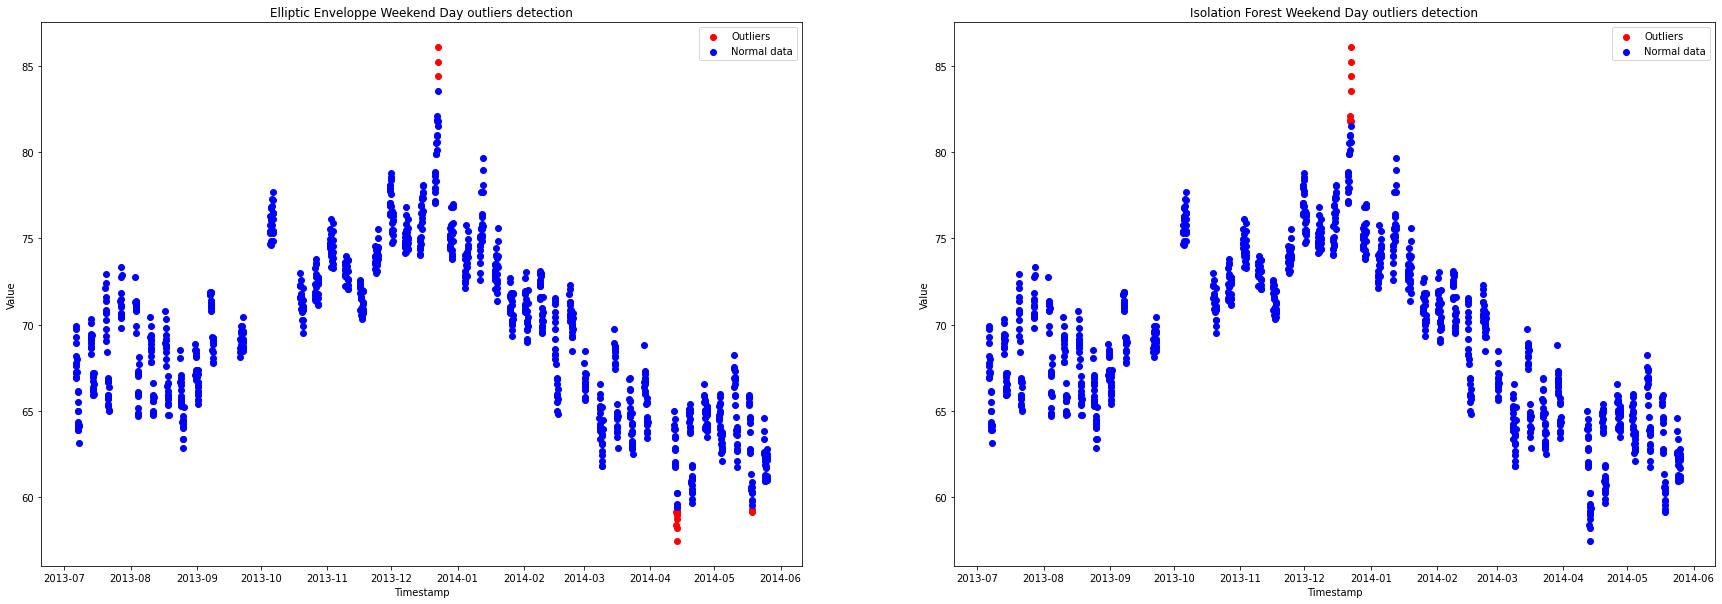

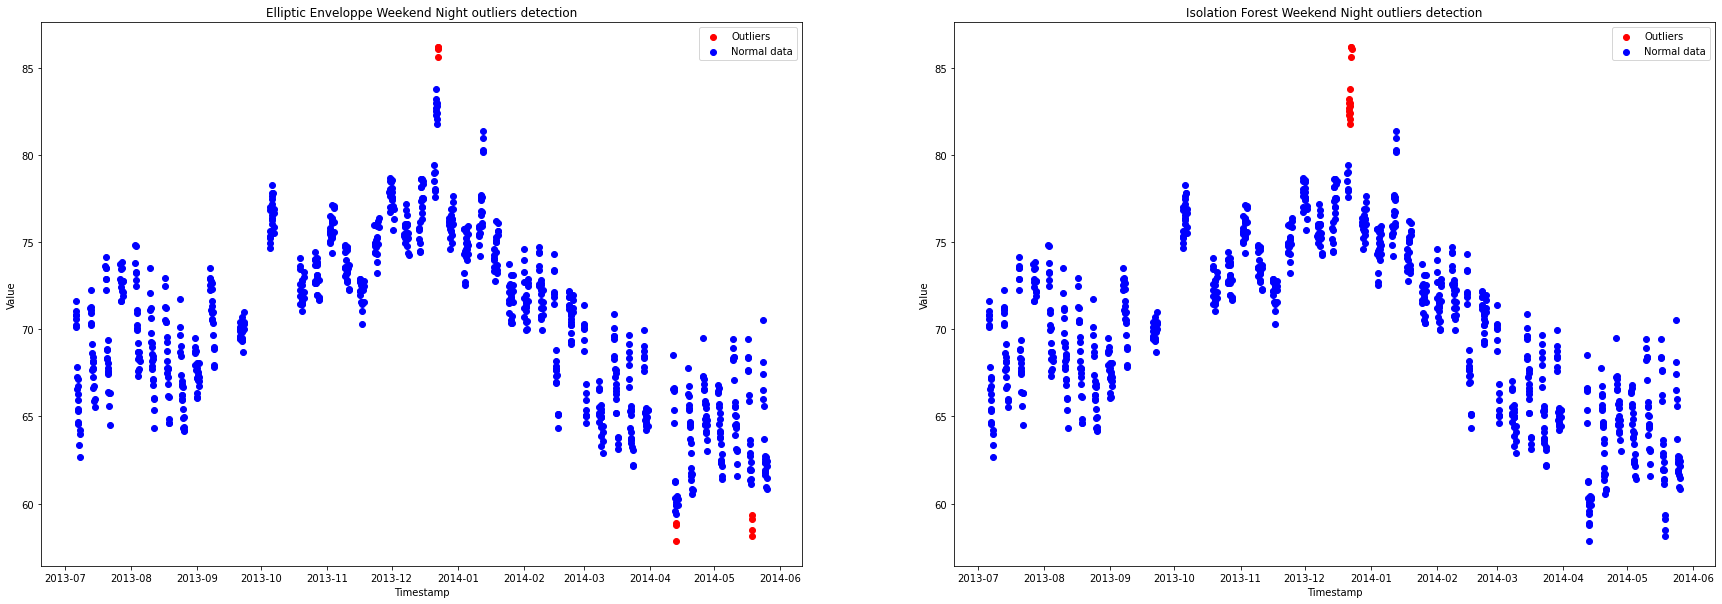

In [52]:
for i in range(0,4):
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.scatter(df[(df['dcat'] == i) & (pred2  == -1)].index, df[(df['dcat'] == i) & (pred2  == -1)]['value'], c = 'red', label = 'Outliers')
    ax.scatter(df[(df['dcat'] == i) & (pred2  == 1)].index, df[(df['dcat'] == i) & (pred2  == 1)]['value'], c = 'blue', label = 'Normal data')
    ax2.scatter(df[(df['dcat'] == i) & (pred_iso2  == -1)].index, df[(df['dcat'] == i) & (pred_iso2  == -1)]['value'], c = 'red', label = 'Outliers')
    ax2.scatter(df[(df['dcat'] == i) & (pred_iso2  == 1)].index, df[(df['dcat'] == i) & (pred_iso2  == 1)]['value'], c = 'blue', label = 'Normal data')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Value')
    ax2.set_xlabel('Timestamp')
    ax2.set_ylabel('Value')
    ax.set_title(f'Elliptic Enveloppe {reverse_dictionnary[i]} outliers detection')
    ax2.set_title(f'Isolation Forest {reverse_dictionnary[i]} outliers detection')
    ax.legend()
    ax2.legend()

Overall, I'd say that isolation Elliptic envelopper does a better job are detecting outlier especially lower bound outliers when the contamination value is set to 0.48%. In a sense, Isolation forest seems to be more sensitive to upper bound outliers while Elliptic Enveloppe seems to be more balanced. My interpretation of the project is that we would rather go with Elliptic Enveloppe because we are not interested in detecting only upper bound outliers in this exercise